In [26]:
# Calculate the approximate length of parabolic rope hanging between (0,0) and (1,q) 

import sympy, numpy
a, b, x, q = sympy.symbols("a b x q")
y = b*x - a*x**2 
bs = sympy.solve(y.subs(x, 1)-q, b)
y = y.subs(b, bs[0]).simplify()
I = sympy.sqrt(1 + sympy.diff(y, x)**2)
I

sqrt((-2*a*x + a + q)**2 + 1)

In [167]:
bs

[a + q]

In [108]:
import scipy.integrate

nq = numpy.arange(0.1, 10, 0.2)
na = numpy.arange(0.1, 10, 0.2)
gq, ga = numpy.meshgrid(nq, na)
gqa = gq.flatten()
gaa = ga.flatten()
L = [ ]

def f(x):
    return numpy.sqrt((-2*qa*x + qa + qq)**2 + 1)
for qa, qq in zip(gaa, gqa):
    l = scipy.integrate.quad(f, 0, 1)[0]
    L.append(l)
L = numpy.array(L)

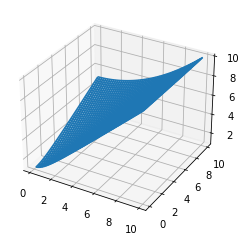

In [112]:
L = numpy.array(L)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
gL = L.reshape(gq.shape)
ax.plot_wireframe(gq, ga, gL)


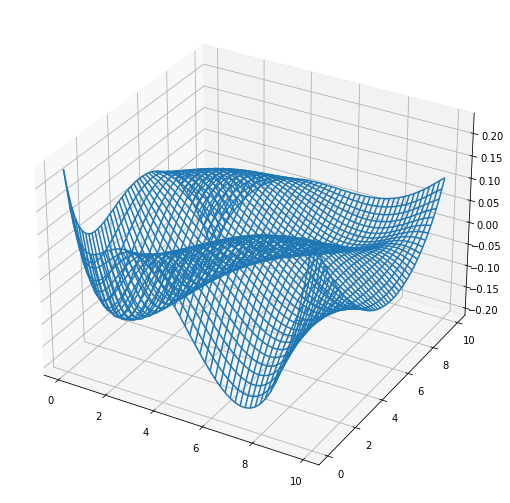

In [149]:
import numpy as np

X = gqa
Y = gaa
L

A = np.array([X*0+1, X, X**2, X**3, Y, Y*X, Y*X**2, Y*X**3, Y**2, Y**2*X, Y**2*X**2]).T
B = L

coeff, r, rank, s = np.linalg.lstsq(A, B, rcond=None)
print(list(coeff))

LA = A@coeff

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
gLA = LA.reshape(gq.shape)
#ax.plot_wireframe(gq, ga, gL)
#ax.plot_wireframe(gq, ga, gLA, color="red")
ax.plot_wireframe(gq, ga, gL-gLA)


In [175]:
c = [0.6846094267632553, 0.5490693560779955, 0.10155603064930156, -0.0065641284014727455, 0.32724146179683267, -0.1282922369501835, 0.005644904325406289, 0.0005066041448132827, 0.014515220403965912, 0.005970564724231822, -0.00083630038220914]
def paraba(L, q):
    X = q
    yc = c[0] + X*c[1] + X**2*c[2] + X**3*c[3]
    yb = c[4] + X*c[5] + X**2*c[6] + X**3*c[7]
    ya = c[8] + X*c[9] + X**2*c[10]
    return (-yb + numpy.sqrt(yb**2 - 4*ya*(yc-L)))/(2*ya)

def plota(L, q):
    x = numpy.linspace(0, 1, 20)
    a = paraba(L, q)
    y = x**2*a + x*(q-a)
    plt.plot(x, y)

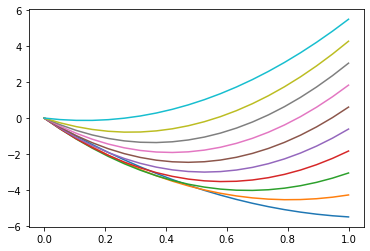

In [186]:
L = 9
qr = 5.5
for q in numpy.linspace(-qr, qr, 10):
    plota(6, q)

In [195]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

qr = 5.5
@widgets.interact(L=9, q=(-qr,qr))
def plota(L, q):
    x = numpy.linspace(0, 1, 20)
    a = paraba(L, q)
    y = x**2*a + x*(q-a)
    plt.figure(figsize=(5, 10))
    plt.plot(x, y)
    plt.gca().set_aspect('equal')
    plt.ylim(-6,4)

interactive(children=(IntSlider(value=9, description='L', max=27, min=-9), FloatSlider(value=0.0, description=…

In [11]:
# Verlet calculation#

  
import math
from collections import namedtuple
class P2(namedtuple('P2', ['u', 'v'])):
    __slots__ = ()
    def __new__(self, u, v):
        return super(P2, self).__new__(self, float(u), float(v))
    def __repr__(self):
        return "P2(%s, %s)" % (self.u, self.v)
    def __add__(self, a):
        return P2(self.u + a.u, self.v + a.v)
    def __sub__(self, a):
        return P2(self.u - a.u, self.v - a.v)
    def __mul__(self, a):
        return P2(self.u*a, self.v*a)
    def __neg__(self):
        return P2(-self.u, -self.v)
    def __rmul__(self, a):
        return P2(self.u*a, self.v*a)
    def Lensq(self):
        return self.u*self.u + self.v*self.v
    def Len(self):
        if self.u == 0.0:  return abs(self.v)
        if self.v == 0.0:  return abs(self.u)
        return math.sqrt(self.u*self.u + self.v*self.v)
    def LenLZ(self):
        return math.sqrt(self.x*self.x + self.y*self.y)
    def Arg(self):
        return math.degrees(math.atan2(self.v, self.u))
    

[0.2922898676547276, 0.26286076754584814, 0.26962012570881766, 0.31471186233016224, 0.21]


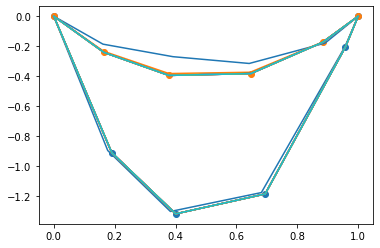

In [71]:
from matplotlib import pyplot as plt

ropeseglen = 0.21
verletfriction = 0.9
verletgravity = P2(0,-0.5)
nverts = [ P2(x/5,0)  for x in range(0,6) ]
old_nverts = nverts.copy()

def verletprojstep():
    for i in range(1, len(nverts)-1):
        nvec = nverts[i] - old_nverts[i]
        old_nverts[i] = nverts[i] 
        nverts[i] += nvec*verletfriction + verletgravity

def verletpullstep():
    for i in range(1, len(nverts)):
        vec = nverts[i] - nverts[i-1]
        vecleng = vec.Len()
        
        h = 1.0 - ropeseglen/vecleng
        if i == len(nverts)-1:
            nverts[i-1] = nverts[i-1] + h*vec
        elif i-1 == 0:
            nverts[i] = nverts[i] - h*vec
        else:
            nverts[i-1] = nverts[i-1] + (h/2)*vec
            nverts[i] = nverts[i] - (h/2)*vec



for k in range(2):
    for i in range(10):
        for j in range(10):
            verletprojstep()
            verletpullstep()
        plt.plot([v.u for v in nverts], [v.v for v in nverts])
    verletgravity *= 0.1
    plt.scatter([v.u for v in nverts], [v.v for v in nverts])
    

print([(a-b).Len()  for a, b in zip(nverts, nverts[1:])])


In [38]:
print([(a-b).Len()  for a, b in zip(nverts, nverts[1:])])


[0.9238978767642472, 0.45251093806899606, 0.3226560485429616, 1.0041680235082269, 0.19999999999999998]


0.9984386223086225


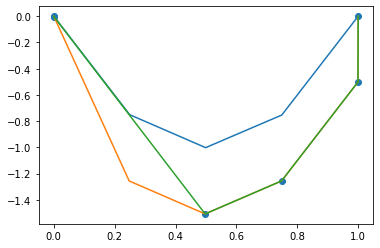

In [65]:
def verletpullstep():
    for i in range(1, len(nverts)):
        vec = nverts[i] - nverts[i-1]
        vecleng = vec.Len()
        
        h = 1.0 - ropeseglen/vecleng
        if i == len(nverts)-1:
            nverts[i-1] = nverts[i-1] + h*vec
        elif i-1 == 0:
            nverts[i] = nverts[i] - h*vec
        else:
            nverts[i-1] = nverts[i-1] + (h/2)*vec
            nverts[i] = nverts[i] - (h/2)*vec
        if i < 2:
            print(h)
            plt.plot([v.u for v in nverts], [v.v for v in nverts])
            plt.scatter([v.u for v in nverts], [v.v for v in nverts])


plt.plot([v.u for v in nverts], [v.v for v in nverts])
verletprojstep()
plt.plot([v.u for v in nverts], [v.v for v in nverts])
verletpullstep()


[0.6177345183609523, 0.49999999999999994]


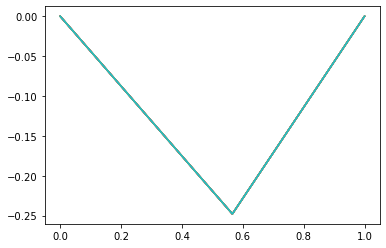

In [41]:
from matplotlib import pyplot as plt

ropeseglen = 0.5
verletfriction = 0.9
verletgravity = P2(0,-0.5)
nverts = [ P2(x/2,0)  for x in range(0,3) ]
old_nverts = nverts.copy()

def verletprojstep():
    for i in range(1, len(nverts)-1):
        nvec = nverts[i] - old_nverts[i]
        old_nverts[i] = nverts[i] 
        nverts[i] += nvec*verletfriction + verletgravity

def verletpullstep():
    for i in range(1, len(nverts)):
        vec = nverts[i] - nverts[i-1]
        vecleng = vec.Len()
        
        h = 1.0 - ropeseglen/vecleng
        if i == len(nverts)-1:
            nverts[i-1] = nverts[i-1] + h*vec
        elif i-1 == 0:
            nverts[i] = nverts[i] - h*vec
        else:
            nverts[i-1] = nverts[i-1] + (h/2)*vec
            nverts[i] = nverts[i] - (h/2)*vec



for i in range(10):
    for j in range(100):
        verletprojstep()
        for j in range(1):
            verletpullstep()
    plt.plot([v.u for v in nverts], [v.v for v in nverts])
    

print([(a-b).Len()  for a, b in zip(nverts, nverts[1:])])


In [66]:
ropeseglen

0.002

[0.6086299510770908, 0.5]


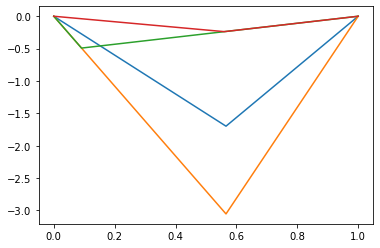

In [50]:
def verletpullstepA():
    for i in range(1, len(nverts)):
        vec = nverts[i] - nverts[i-1]
        vecleng = vec.Len()
        
        h = 1.0 - ropeseglen/vecleng
        if i == len(nverts)-1:
            nverts[i-1] = nverts[i-1] + h*vec
        elif i-1 == 0:
            nverts[i] = nverts[i] - h*vec
        else:
            nverts[i-1] = nverts[i-1] + (h/2)*vec
            nverts[i] = nverts[i] - (h/2)*vec
        plt.plot([v.u for v in nverts], [v.v for v in nverts])


plt.plot([v.u for v in nverts], [v.v for v in nverts])
verletprojstep()
plt.plot([v.u for v in nverts], [v.v for v in nverts])
verletpullstepA()
print([(a-b).Len()  for a, b in zip(nverts, nverts[1:])])
